# **Phase 1 - Data Collection and Exploratory Data Analysis (EDA)**

**Step 1 - Data Collection and Preprocessing**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [78]:
file_path = '/content/drive/MyDrive/Colab Notebooks/TuteDude/Assignment/employee_data.csv'
df = pd.read_csv(file_path)

In [79]:
print("First 5 rows of the data:")
df.head()

First 5 rows of the data:


,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [80]:
print("Last 5 rows of the data:")
df.tail()

Last 5 rows of the data:


,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
95,96,Daniel Allen,29,HR,53000,3,79,No
96,97,Thomas Harris,40,Engineering,91000,13,92,Yes
97,98,Michael Lewis,45,Sales,75000,16,89,No
98,99,Linda Young,50,HR,70000,21,87,Yes
99,100,John Harris,29,Engineering,87000,8,91,No


In [81]:
print("Shape of the data:", df.shape) # Shape of the dataset

Shape of the data: (100, 8)


In [82]:
print("Column names of the dataset",df.columns)

Column names of the dataset Index(['EmployeeID', 'Name', 'Age', 'Department', 'Salary', 'YearsAtCompany',
       'PerformanceScore', 'Attrition'],
      dtype='object')


In [83]:
print("Mission values in the dataset : ",df.isnull().sum()) #handling mission values, there is no missing values in the dataset

Mission values in the dataset :  EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64


In [84]:
print("Duplicate values in the dataset : ", df.duplicated().sum())

Duplicate values in the dataset :  0


In [85]:
# if there is any duplicate value it will remove by
#df = df.drop_duplicates()

*Note: From above it is clear that the dataset is already in proper shape for analysis further. *

In [86]:
print("Cleaned Data Info:")
print(df.info())  # Check data types and non-null counts

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB
None


**Step 2 - Exploratory Data Analysis (EDA)**

In [87]:
# Calculate the Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

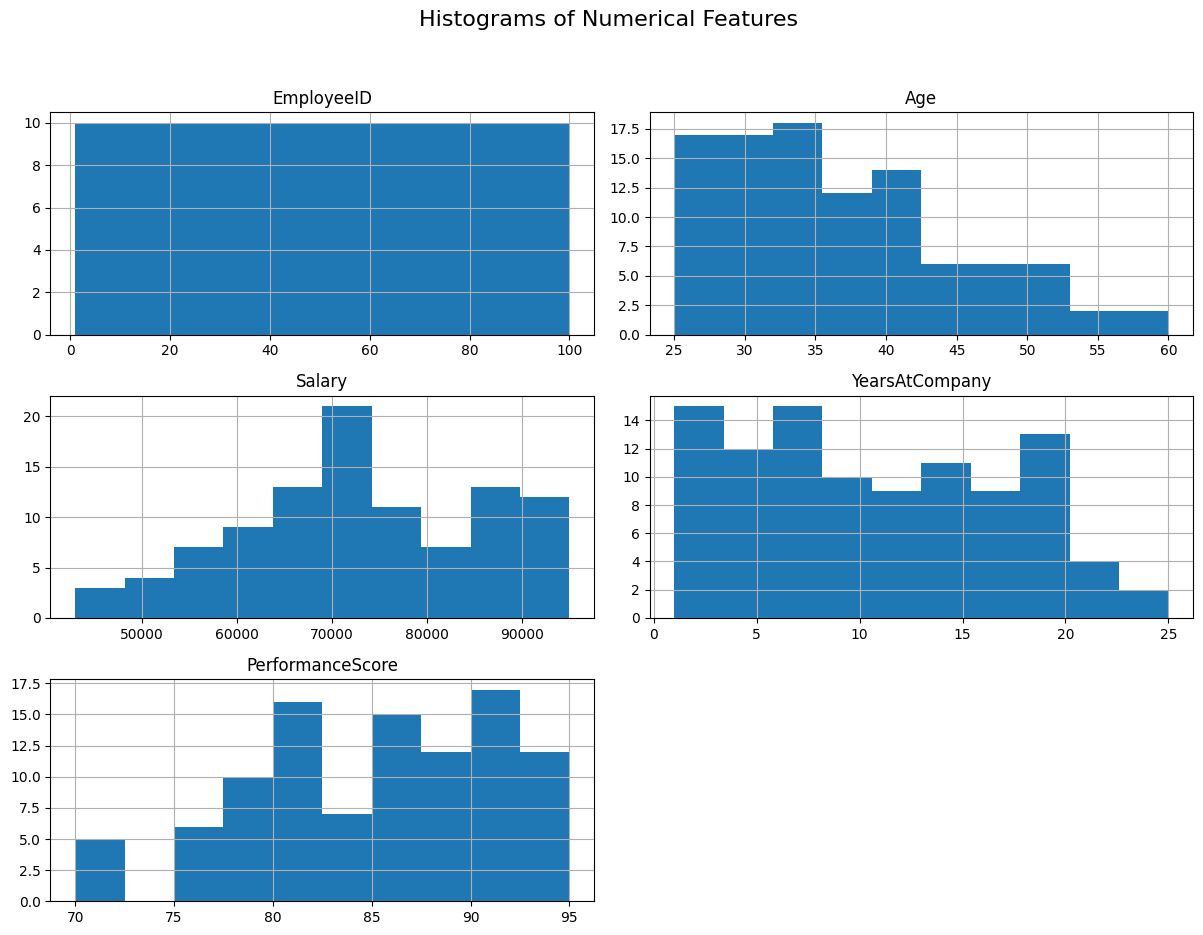

In [89]:
# Visualize distributions using histograms
df.hist(figsize=(12, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

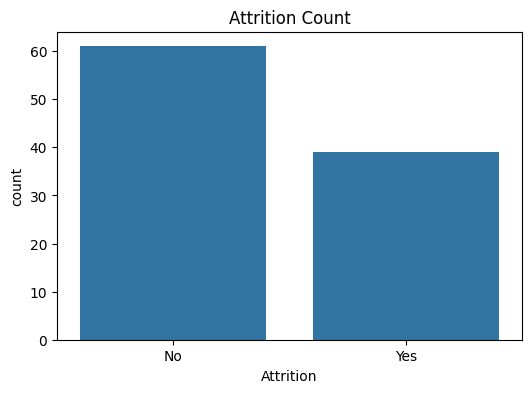

In [90]:
#Visualize attrition count
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()

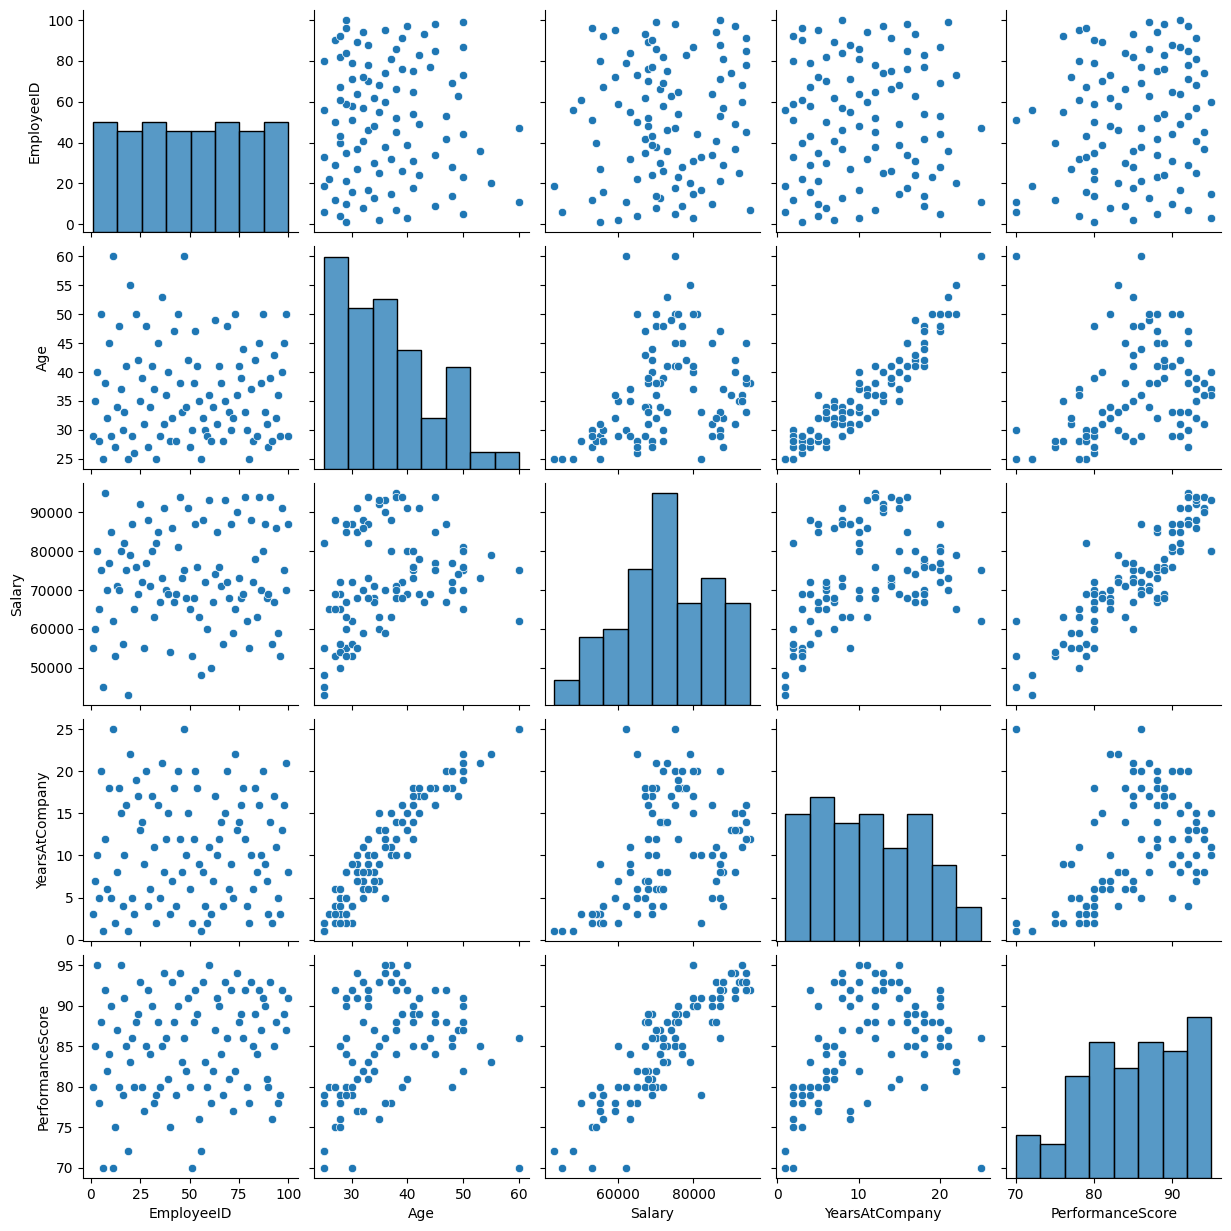

In [91]:
#Pairplot using seaborn
sns.pairplot(df)
plt.show()

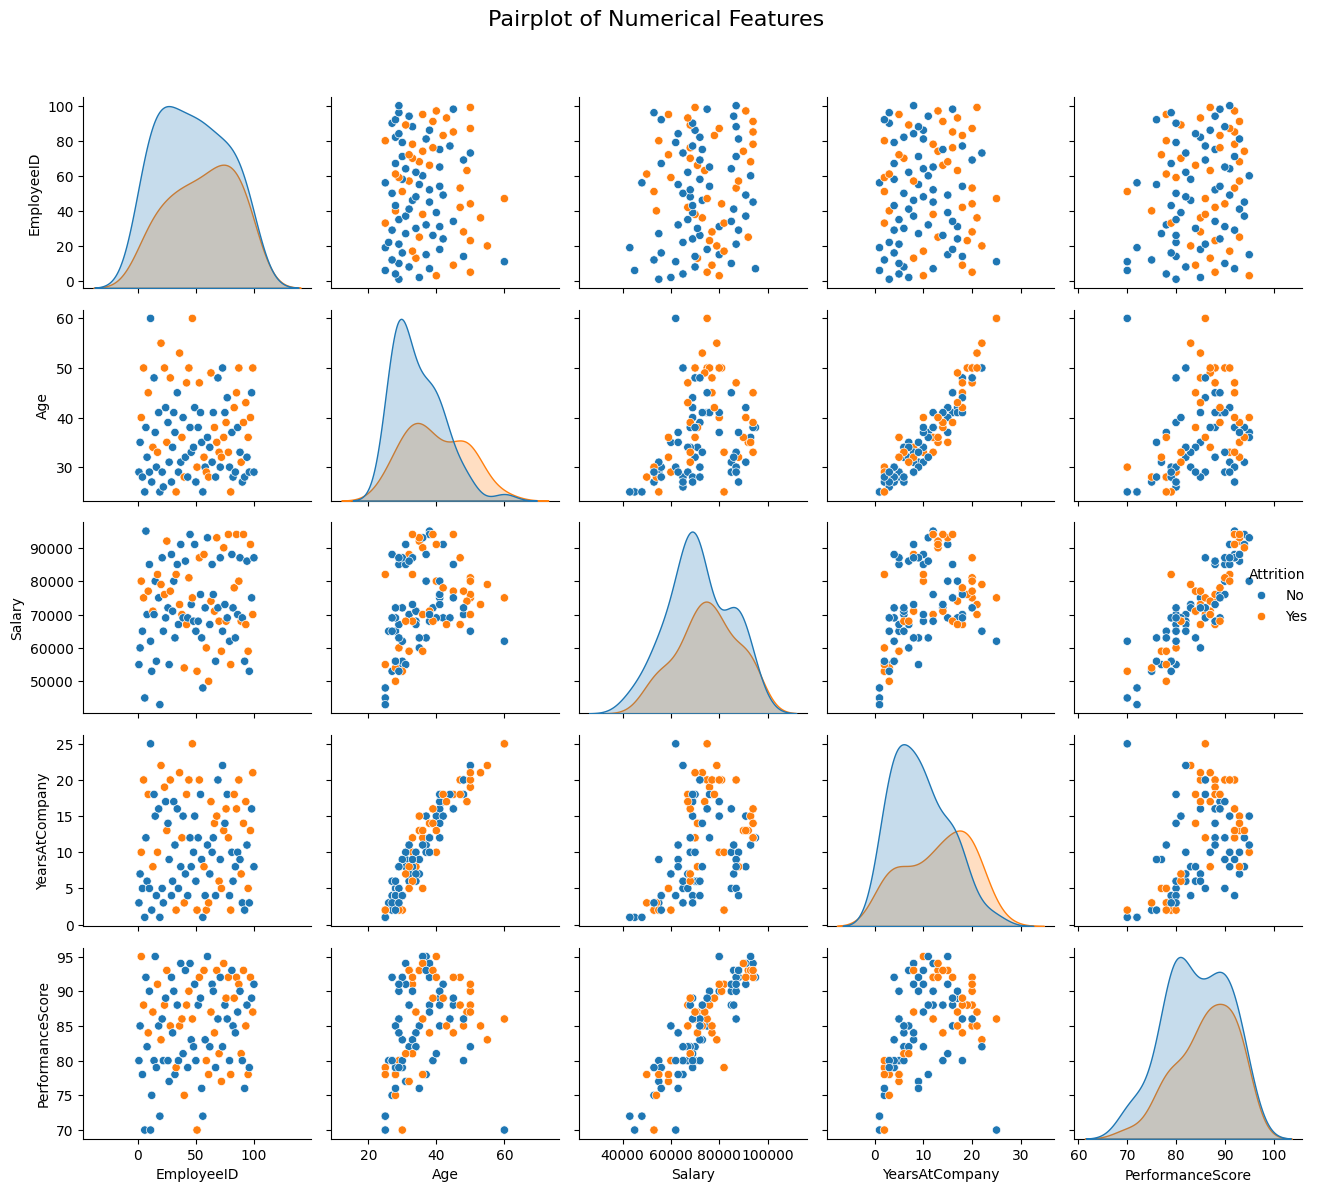

In [92]:
# Pairplot
sns.pairplot(df, hue='Attrition') # Using attrition as hue to differentiate on basis of attrition.
plt.suptitle("Pairplot of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

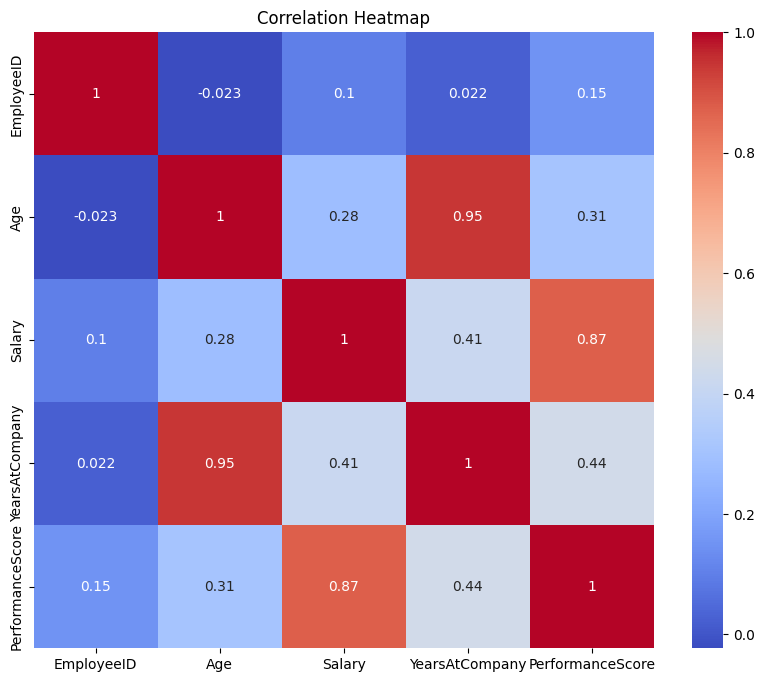

In [93]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True) #Using the numerical values, hence mentioning 'numeric_only'
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

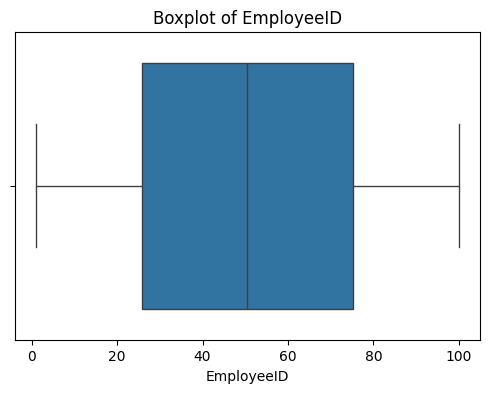

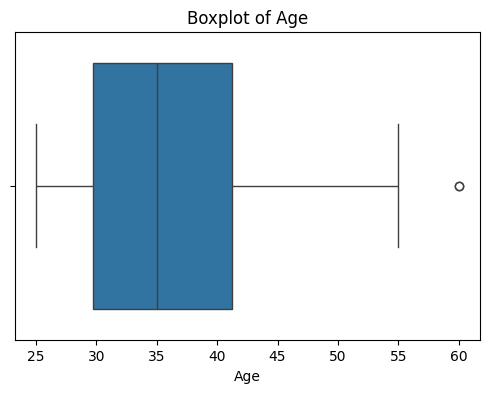

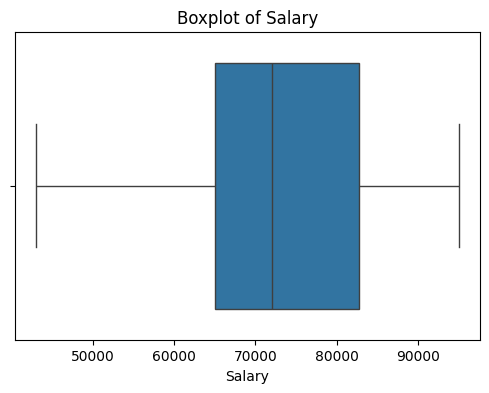

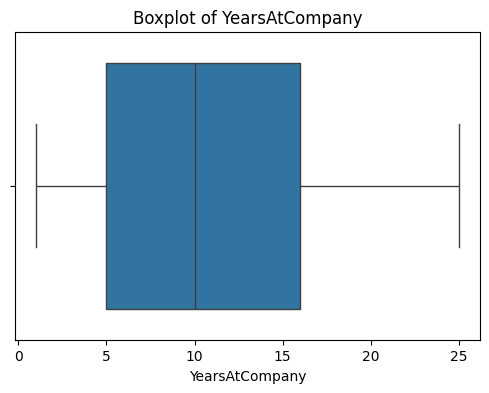

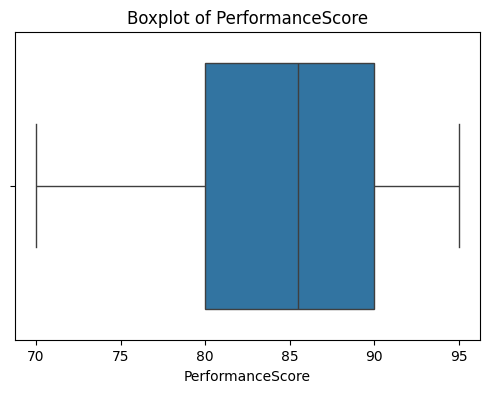

In [94]:
# Boxplots for outliers
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [20]:
# from the above box plot is observed that there is one outlier visible on the higher end of the age range (around 60)
# but the retirement age for service men is 60 years. So, I ignore this and accept the value for further analysis

**Step 3 - Probability and Statistical Analysis**

In [108]:
#Calculate the probability of an employee leaving based on factors like performance scores and department.
# Probability of leaving based on department
attrition_by_dept = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()
print("Probability of Attrition by Department :\n", attrition_by_dept*100)

Probability of Attrition by Department :
 Attrition           No        Yes
Department                       
Engineering  57.142857  42.857143
HR           65.384615  34.615385
Marketing    80.000000  20.000000
Sales        46.153846  53.846154


In [96]:
df.columns

Index(['EmployeeID', 'Name', 'Age', 'Department', 'Salary', 'YearsAtCompany',
       'PerformanceScore', 'Attrition'],
      dtype='object')

In [109]:
# Probability of leaving based on performance scores
attrition_by_PF = df.groupby('PerformanceScore')['Attrition'].value_counts(normalize=True).unstack()
print("Probability of Attrition by Performance Score :\n", attrition_by_PF*100)

Probability of Attrition by Performance Score :
 Attrition                 No        Yes
PerformanceScore                       
70                 66.666667  33.333333
72                100.000000        NaN
75                 50.000000  50.000000
76                100.000000        NaN
77                 50.000000  50.000000
78                 40.000000  60.000000
79                 80.000000  20.000000
80                 88.888889  11.111111
81                 33.333333  66.666667
82                100.000000        NaN
83                 66.666667  33.333333
84                 50.000000  50.000000
85                 50.000000  50.000000
86                 60.000000  40.000000
87                 25.000000  75.000000
88                 57.142857  42.857143
89                 60.000000  40.000000
90                 80.000000  20.000000
91                 60.000000  40.000000
92                 42.857143  57.142857
93                 33.333333  66.666667
94                 66.666667  3

In [117]:
#Bayes' Theorem - Use Bayes' Theorem to find the probability of employee attrition given performance score.
# Bayes' Theorem (P(Attrition | Performance Score))
# Convert Performance Score into categories (e.g., Low, Medium, High)
df['PerformanceCategory'] = pd.qcut(df['PerformanceScore'], q=3, labels=['Low', 'Medium', 'High'])

# Calculate P(Attrition | PerformanceCategory)
attrition_given_performance = df.groupby('PerformanceCategory')['Attrition'].value_counts(normalize=True).unstack()
print("\nProbability of Attrition given Performance Category:\n", attrition_given_performance)


Probability of Attrition given Performance Category:
 Attrition                  No       Yes
PerformanceCategory                    
Low                  0.729730  0.270270
Medium               0.517241  0.482759
High                 0.558824  0.441176


<ipython-input-117-b0b9e635404c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_given_performance = df.groupby('PerformanceCategory')['Attrition'].value_counts(normalize=True).unstack()


In [119]:
PF_depart = df.groupby('Department')['PerformanceCategory'].value_counts(normalize=True).unstack()
print("Performance evalaution department wise  :\n", PF_depart*100)

Performance evalaution department wise  :
 PerformanceCategory        Low     Medium       High
Department                                          
Engineering           3.571429   7.142857  89.285714
HR                   53.846154  42.307692   3.846154
Marketing            45.000000  50.000000   5.000000
Sales                50.000000  23.076923  26.923077


In [124]:
PF_depart = df.groupby('PerformanceCategory')['Department'].value_counts(normalize=True).unstack()
print("Performance evalaution department wise  :\n", PF_depart*100)

Performance evalaution department wise  :
 Department           Engineering         HR  Marketing      Sales
PerformanceCategory                                              
Low                     2.702703  37.837838  24.324324  35.135135
Medium                  6.896552  37.931034  34.482759  20.689655
High                   73.529412   2.941176   2.941176  20.588235


<ipython-input-124-5d800814736e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  PF_depart = df.groupby('PerformanceCategory')['Department'].value_counts(normalize=True).unstack()


In [105]:
# Find the cut points (boundaries between categories)
cut_points = df['PerformanceScore'].quantile([1/3, 2/3])  # Quantiles for 3 categories

In [106]:
# Print the categories and ranges
print("Performance Score Ranges:")
print(f"Low: {df['PerformanceScore'].min()} - {cut_points[1/3]:.2f}")
print(f"Medium: {cut_points[1/3]:.2f} - {cut_points[2/3]:.2f}")
print(f"High: {cut_points[2/3]:.2f} - {df['PerformanceScore'].max()}")

Performance Score Ranges:
Low: 70 - 82.00
Medium: 82.00 - 89.00
High: 89.00 - 95


In [107]:
print("\nCategory Counts:")
print(df['PerformanceCategory'].value_counts().sort_index())


Category Counts:
PerformanceCategory
Low       37
Medium    29
High      34
Name: count, dtype: int64


Hypothesis Testing - Test whether the mean performance score differs across departments.

In [25]:
import scipy.stats as stats

In [26]:
# Hypothesis Testing (T-test for mean performance score across departments)
departments = df['Department'].unique()
print(departments)

['Sales' 'HR' 'Engineering' 'Marketing']


In [27]:
# Perform t-tests between each pair of departments
from itertools import combinations

for dept1, dept2 in combinations(departments, 2):
    group1 = df[df['Department'] == dept1]['PerformanceScore']
    group2 = df[df['Department'] == dept2]['PerformanceScore']

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(group1, group2)

    print(f"\nT-test between {dept1} and {dept2}:")
    print(f"  T-statistic: {t_statistic:.3f}")
    print(f"  P-value: {p_value:.3f}")

    alpha = 0.05  # Significance level
    if p_value < alpha:
        print(f"  Reject the null hypothesis: There is a significant difference in mean performance scores between {dept1} and {dept2}")
    else:
        print(f"  Fail to reject the null hypothesis: There is no significant difference in mean performance scores between {dept1} and {dept2}")


T-test between Sales and HR:
  T-statistic: 0.615
  P-value: 0.541
  Fail to reject the null hypothesis: There is no significant difference in mean performance scores between Sales and HR

T-test between Sales and Engineering:
  T-statistic: -6.790
  P-value: 0.000
  Reject the null hypothesis: There is a significant difference in mean performance scores between Sales and Engineering

T-test between Sales and Marketing:
  T-statistic: -0.448
  P-value: 0.656
  Fail to reject the null hypothesis: There is no significant difference in mean performance scores between Sales and Marketing

T-test between HR and Engineering:
  T-statistic: -8.505
  P-value: 0.000
  Reject the null hypothesis: There is a significant difference in mean performance scores between HR and Engineering

T-test between HR and Marketing:
  T-statistic: -1.237
  P-value: 0.223
  Fail to reject the null hypothesis: There is no significant difference in mean performance scores between HR and Marketing

T-test between E

# Phase 2 - Predictive Modeling

Step 4 - Feature Engineering and Encoding

Scale numerical features such as Salary and Performance Scores using Min-Max Scaling or Standardization.
Apply Label Encoding to categorical features (e.g., Attrition, Department).

In [28]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Scale numerical features
scaler = MinMaxScaler()
numerical_cols = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Encode categorical features
label_encoder = LabelEncoder()
categorical_cols = ['Department', 'Attrition', 'PerformanceCategory'] #Including performance category created in probability step 3.
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("\nEncoded Data:")
print(df.head())
print(df.tail())


Encoded Data:
   EmployeeID           Name       Age  Department    Salary  YearsAtCompany  \
0           1       John Doe  0.114286           3  0.230769        0.083333   
1           2     Jane Smith  0.285714           1  0.326923        0.250000   
2           3  Michael Brown  0.428571           0  0.711538        0.375000   
3           4    Emily Davis  0.085714           2  0.423077        0.166667   
4           5  David Johnson  0.714286           3  0.615385        0.791667   

   PerformanceScore  Attrition  PerformanceCategory  
0              0.40          0                    1  
1              0.60          0                    2  
2              1.00          1                    0  
3              0.32          0                    1  
4              0.72          1                    2  
    EmployeeID           Name       Age  Department    Salary  YearsAtCompany  \
95          96   Daniel Allen  0.114286           1  0.192308        0.083333   
96          97  Th

**Step 5 - Employee Attrition Prediction Model**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = df.drop(['Attrition', 'EmployeeID','Name'], axis=1)
y = df['Attrition']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Logistic Regression Model:
  Accuracy: 0.5333333333333333
  Precision: 0.25
  Recall: 0.2
  F1-score: 0.2222222222222222


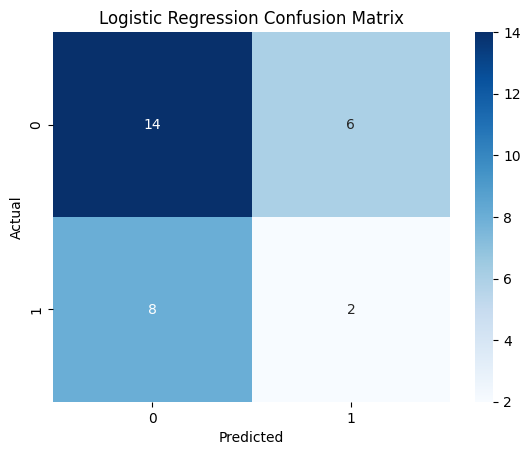

In [30]:
# Logistic Regression Model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Evaluate Logistic Regression
print("\nLogistic Regression Model:")
print("  Accuracy:", accuracy_score(y_test, logistic_predictions))
print("  Precision:", precision_score(y_test, logistic_predictions))
print("  Recall:", recall_score(y_test, logistic_predictions))
print("  F1-score:", f1_score(y_test, logistic_predictions))

# Confusion Matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, logistic_predictions)
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [32]:
# Evaluate Random Forest
print("\nRandom Forest Model:")
print("  Accuracy:", accuracy_score(y_test, rf_predictions))
print("  Precision:", precision_score(y_test, rf_predictions))
print("  Recall:", recall_score(y_test, rf_predictions))
print("  F1-score:", f1_score(y_test, rf_predictions))


Random Forest Model:
  Accuracy: 0.6
  Precision: 0.4
  Recall: 0.4
  F1-score: 0.4


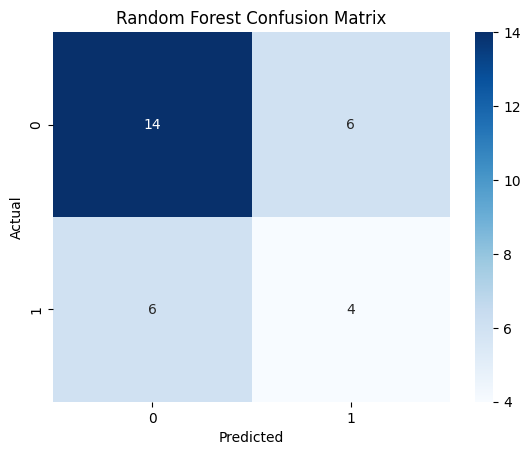

In [33]:
# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Step 6 - Employee Performance Prediction Model**

Split the dataset into training and testing sets.
Build a Linear Regression model to predict Performance Score.
Evaluate the model using R-squared (R²) and Mean Squared Error (MSE).
Visualize predicted vs. actual performance scores.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [35]:
# Define features (X) and target (y)
X = df.drop(['Attrition', 'EmployeeID','Name'], axis=1)
y = df['Attrition']

In [36]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [38]:
# Evaluate the model
r2 = r2_score(y_test, linear_predictions)
mse = mean_squared_error(y_test, linear_predictions)

In [39]:
print("\nLinear Regression Model:")
print("  R-squared:", r2)
print("  Mean Squared Error:", mse)


Linear Regression Model:
  R-squared: -0.19417543976416973
  Mean Squared Error: 0.2716749125463487


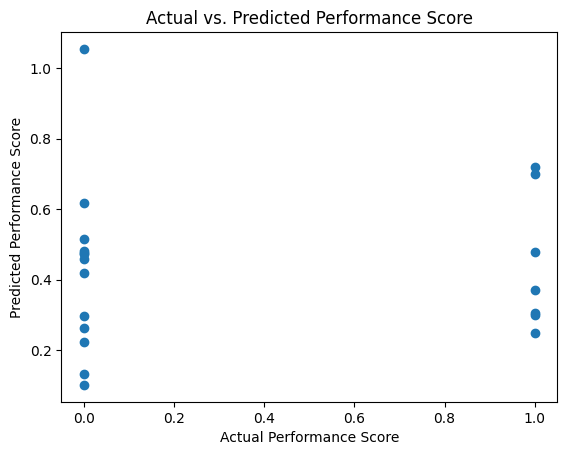

In [40]:
# Visualize predicted vs. actual performance scores
plt.scatter(y_test, linear_predictions)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs. Predicted Performance Score")
plt.show()

# Phase 3 - Deep Learning Models

**Step 7 - Deep Learning for Employee Performance Prediction**

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
#Define features and target variable
X = df.drop(['Attrition', 'EmployeeID','Name'], axis=1)
y = df['Attrition']

In [46]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [50]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [51]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error on the test set:', loss)

Mean Squared Error on the test set: 0.2641710937023163


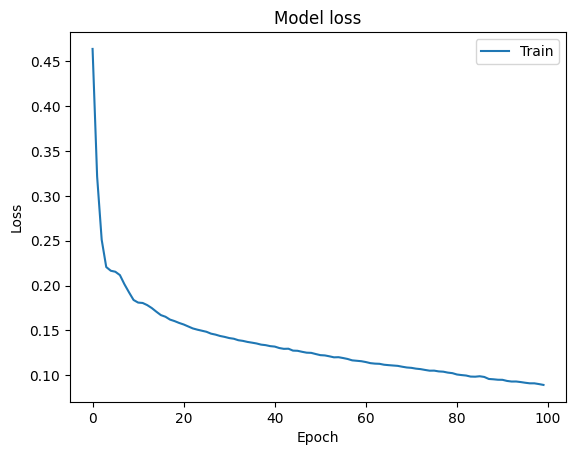

In [52]:
# Plot the training history
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

**Step 8 - Employee Attrition Analysis with Deep Learning**

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [54]:
#Define features and target variable
X = df.drop(['Attrition', 'EmployeeID','Name'], axis=1)
y = df['Attrition']

In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

In [67]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Accuracy on the test set: 60.00%


In [69]:
# Make predictions
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


In [70]:
# Calculate metrics
accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)

In [71]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.6
Precision: 0.4444444444444444
Recall: 0.5714285714285714
F1 Score: 0.5


# Phase 4 - Reporting and Insights

**Step 9 - Insights and Recommendations**

**Key Findings:**

**Factors Contributing to Performance:** It has been that there is a positive correlation with "PerformanceScore" and "Salary". That is Performance Score increase with increase in Salary. It simply means that high paid employees perform well in compare to who get less salary.
Based on these t-test results, it is evidence to say that the Engineering department's performance scores are significantly higher than those of the Sales and HR departments.
From the model result, it has been observed that logistic regression model has given 53.3% accuracy and Random Forest Classifier has little improved result with 60.0% accuracy.

**High-Risk Departments for Attrition:** It has been observed that Sales department have the highest attrition rates that is 53.85% followed by Engineering department of rate 42.86% based on your probability calculations. Also  and model predictions.

**Performance Score Impact on Attrition:** Medium performance score category have the highest attrition rates that is 48.28% followed by High performance score category of rate 44.12%.

**Recommendations:**

**Department-Wise Performance Improvement Plans:** Two departments namely HR and sales has consistently lower performance scores with 37.84% and 35.14% respectively, so it is suggested to develop targeted training programs or process improvements for those departments.

**Targeted Employee Engagement Programs:** For departments with high attrition rates such as Sales and Engineering, implement employee engagement initiatives to improve morale, address concerns, and provide growth opportunities.

**Compensation and Benefits Review:** It has been observed that salary is the crucial factor and has a significant factor in both performance and attrition, thus, conduct a review of compensation and benefits packages to ensure competitiveness.